<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Построение графиков</a></span></li><li><span><a href="#Декомпозиция-данных" data-toc-modified-id="Декомпозиция-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Декомпозиция данных</a></span><ul class="toc-item"><li><span><a href="#Графики-для-изначального-временного-ряда" data-toc-modified-id="Графики-для-изначального-временного-ряда-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Графики для изначального временного ряда</a></span></li><li><span><a href="#Графики-для-временного-ряда-за-последний-месяц" data-toc-modified-id="Графики-для-временного-ряда-за-последний-месяц-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Графики для временного ряда за последний месяц</a></span></li><li><span><a href="#Графики-для-временного-ряда-за-последнюю-неделю" data-toc-modified-id="Графики-для-временного-ряда-за-последнюю-неделю-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Графики для временного ряда за последнюю неделю</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates = [0]) 

In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
print(data.isna().sum())

num_orders    0
dtype: int64


Данные осмотрены, с ними всё в порядке. Имеем одну колонку из 26496 значений, которые представляют из себя временной ряд, охватывающий период с 1 марта 2018 года по 31 августа 2018 года. Теперь приступим к ресемплингу данных по одному часу.

In [6]:
data.sort_index(inplace = True)
data = data.resample('1H').sum()

**Вывод** 

Были импортированы библиотеки, рассмотрены данные и выполнено ресемплирование по одному часу.

## Анализ

### Построение графиков

Приступим к анализу данных - начнём с вывода графика данных.

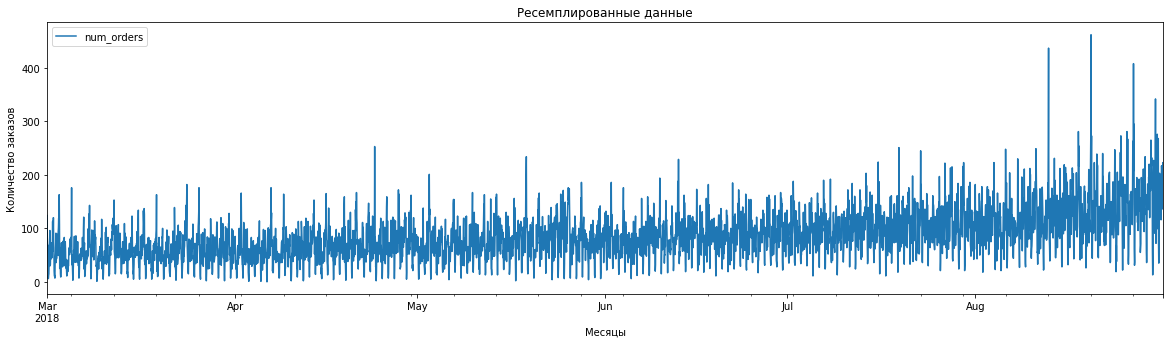

In [7]:
data.plot(figsize = [20, 5])
plt.title('Ресемплированные данные')
plt.xlabel('Месяцы')
plt.ylabel('Количество заказов')
plt.show()

Ничего не понятно, попробуем уменьшить диапазон рассматриваемых данных и вывести график за последний месяц временного ряда.

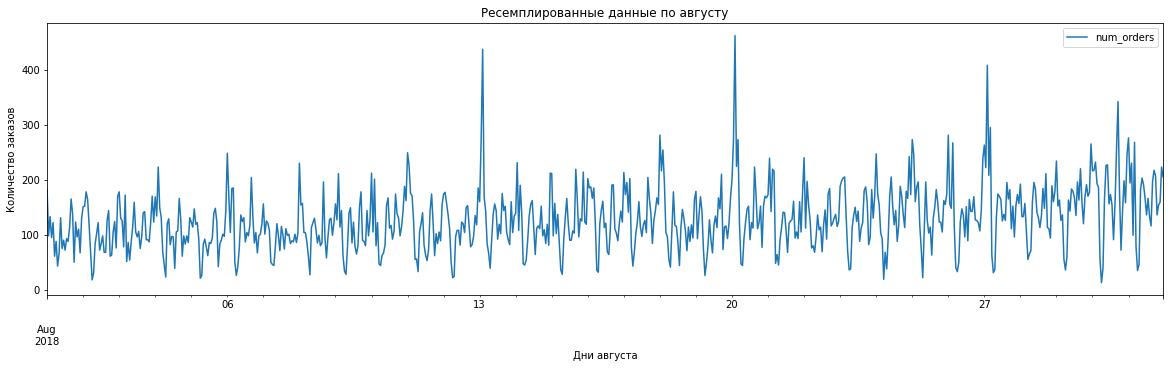

In [8]:
data_august = data['2018-08-01':]
data_august.plot(figsize = [20, 5])
plt.title('Ресемплированные данные по августу')
plt.xlabel('Дни августа')
plt.ylabel('Количество заказов')
plt.show()

По этому графику уже что-то видно. Так, каждую неделю, начиная с 13 августа, происходит скачок по количеству данных. Уменьшим рассматриваемый временной ряд ещё один раз. 

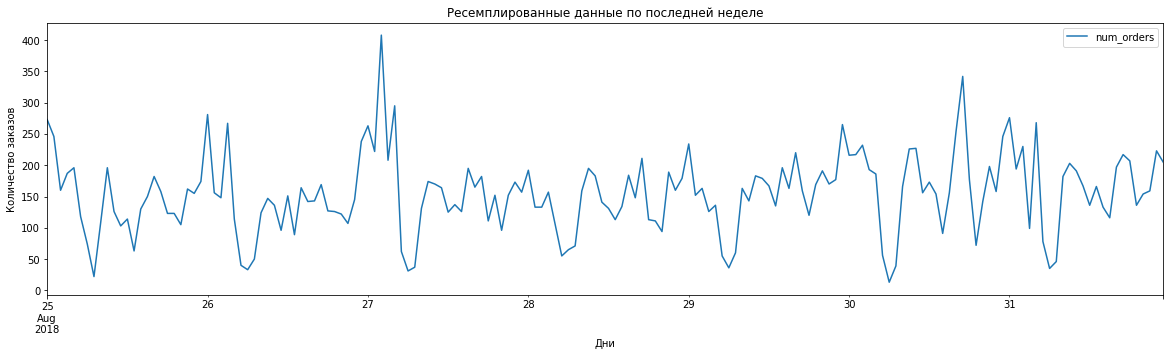

In [9]:
data_last_week = data['2018-08-25':'2018-08-31']
data_last_week.plot(figsize = [20, 5])
plt.title('Ресемплированные данные по последней неделе')
plt.xlabel('Дни')
plt.ylabel('Количество заказов')
plt.show()

Видна некая закономерность количества заказов от времени суток. Но для точного анализа лучше произвести декомпозицию данных.

### Декомпозиция данных

In [10]:
decomposed_data = seasonal_decompose(data)
decomposed_data_august = seasonal_decompose(data_august)
decomposed_data_last_week = seasonal_decompose(data_last_week)

#### Графики для изначального временного ряда

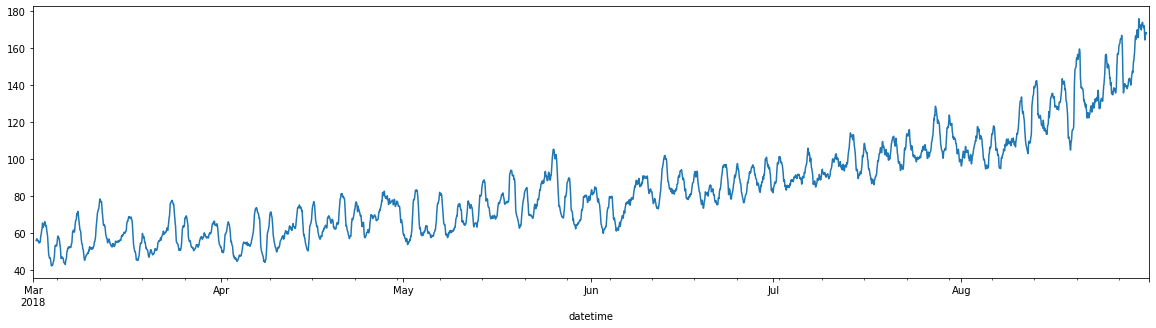

In [11]:
decomposed_data.trend.plot(figsize = [20, 5]);

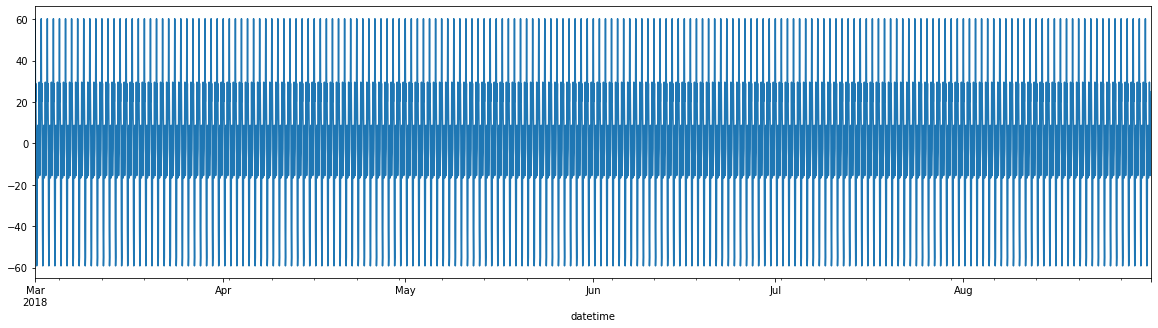

In [12]:
decomposed_data.seasonal.plot(figsize = [20, 5]);

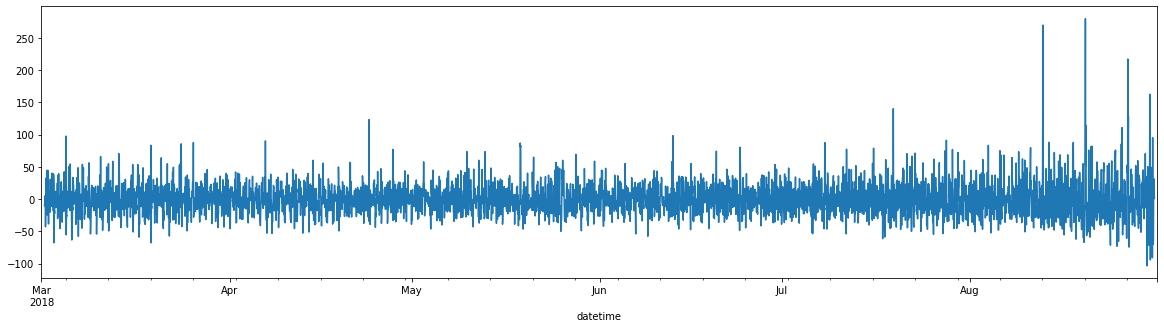

In [13]:
decomposed_data.resid.plot(figsize = [20, 5]);

#### Графики для временного ряда за последний месяц

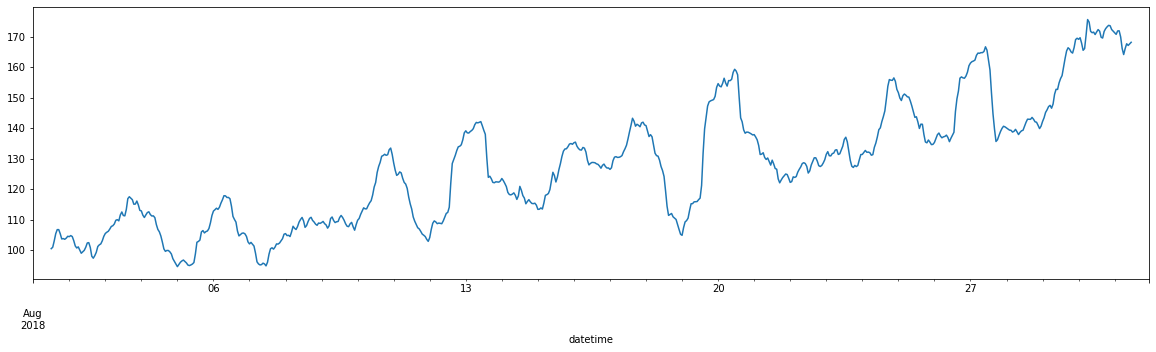

In [14]:
decomposed_data_august.trend.plot(figsize = [20, 5]);

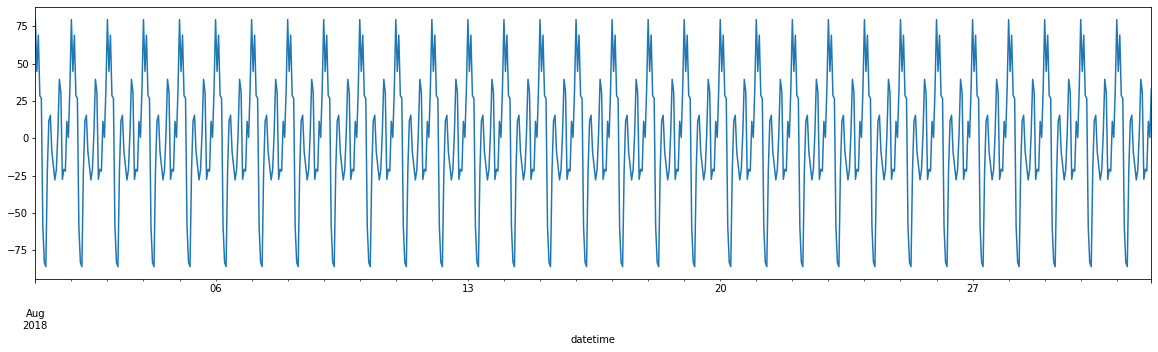

In [15]:
decomposed_data_august.seasonal.plot(figsize = [20, 5]);

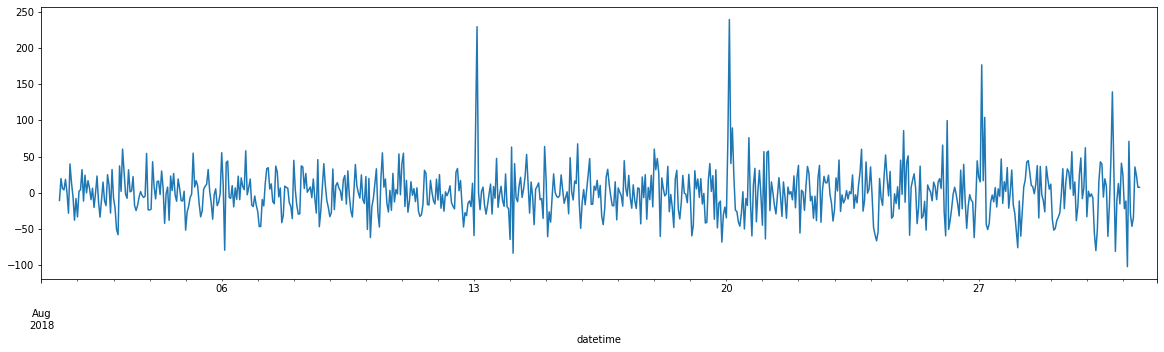

In [16]:
decomposed_data_august.resid.plot(figsize = [20, 5]);

#### Графики для временного ряда за последнюю неделю

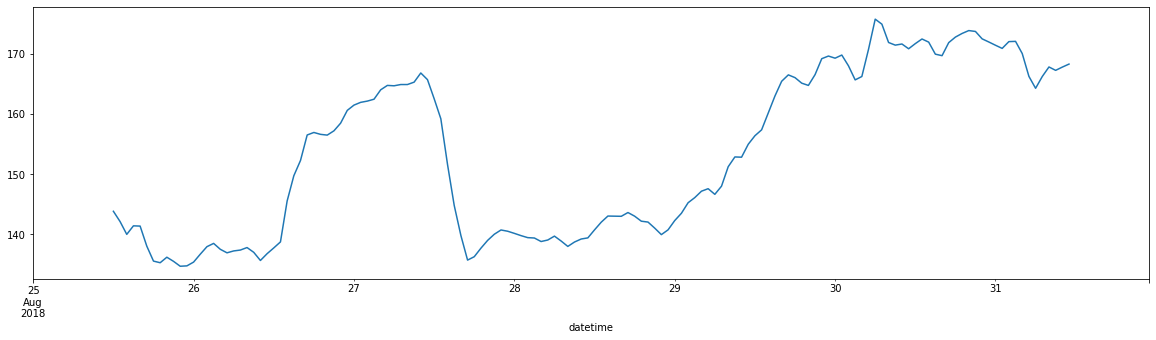

In [17]:
decomposed_data_last_week.trend.plot(figsize = [20, 5]);

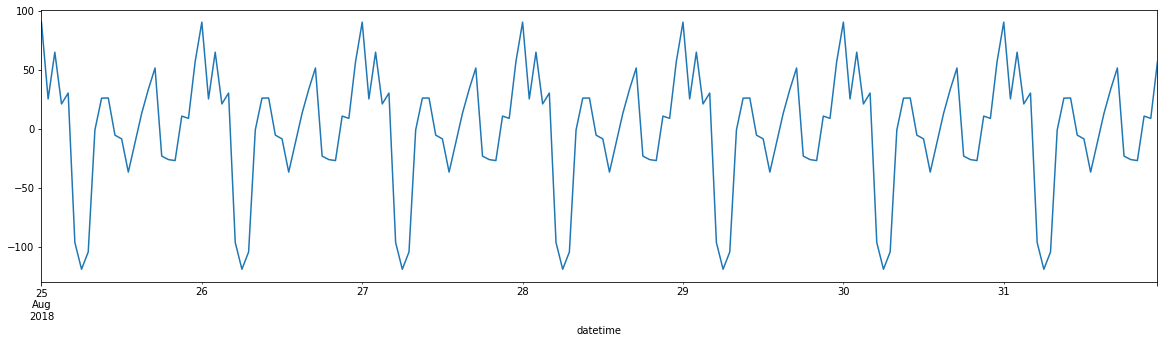

In [18]:
decomposed_data_last_week.seasonal.plot(figsize = [20, 5]);

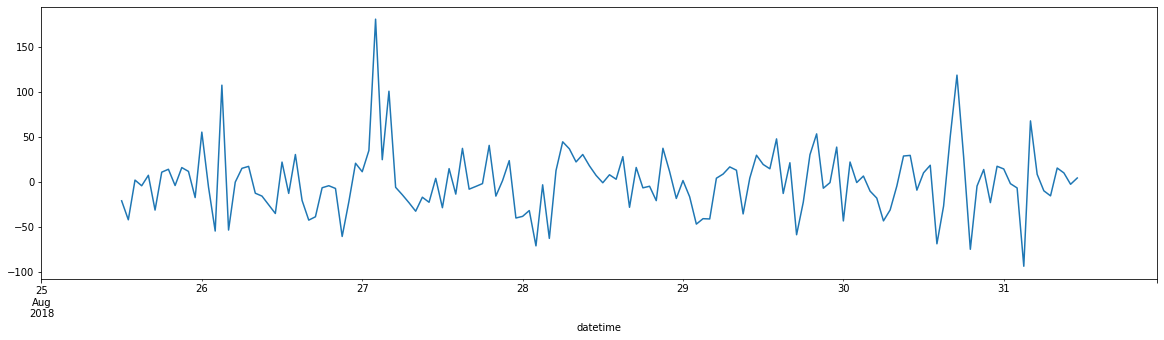

In [19]:
decomposed_data_last_week.resid.plot(figsize = [20, 5]);

Из этих девяти графиков можно выявить следующие закономерности:

* тренд идёт на возрастание - число заказов растёт к августу.
* есть явная суточная сезонность - меньше всего заказов в 6 часов утра, а больше всего ночью (нужно рассмотреть часы).
* 13, 20 и 27 августа 2018 видны скачки в количестве заказов, если верить календарю, то это понедельник (нужно рассмотреть дни недели). 
* число заказов отличается на ежедневной основе (нужно рассмотреть дни).

**Вывод**

Была произведена декомпозиция данных, построены графики и из них выявлены закономерности.

## Обучение

In [20]:
tscv = TimeSeriesSplit(n_splits = 6)

Сделаем функцию для создания признаков

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 198.0 KB


Создадим функцию, которая делит выборку на обучающую и тестовую выборки.

In [22]:
def make_features(timeseries, max_lag, rolling_mean_size):
    timeseries['hour'] = timeseries.index.hour
    timeseries['day'] = timeseries.index.day
    timeseries['dayofweek'] = timeseries.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        timeseries['lag_{}'.format(lag)] = timeseries['num_orders'].shift(lag)

    timeseries['rolling_mean'] = timeseries['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return timeseries

Размер лага и размер окна для скользящего среднего несильно влияют на метрику ошибки, поэтому сделаем их значения равными 24.

In [23]:
data_new = make_features(data, 24, 24)

train, test = train_test_split(data_new, shuffle = False, test_size = 0.1, random_state = 12345)
train = train.dropna()

features_train = train.drop('num_orders', axis = 1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis = 1)
target_test = test['num_orders']

Разделим данные на обучающую и тестовую выборки в соотношении 90%:10%.

А теперь приступим к обучению моделей - линейной регрессии, дерева решений и CatBoostRegressor.

### Линейная регрессия

In [24]:
%%time

regressor = LinearRegression()
rmse_lr = (cross_val_score(regressor, 
                             features_train, 
                             target_train, 
                             cv = tscv, 
                             scoring = 'neg_mean_squared_error').mean() * -1) ** 0.5
print('Значение RMSE для линейной регрессии равно ', rmse_lr)

Значение RMSE для линейной регрессии равно  27.244830167833705
CPU times: user 262 ms, sys: 338 ms, total: 600 ms
Wall time: 585 ms


### Дерево решений

In [25]:
%%time

model_dt = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 15)]
parameters = [{'max_depth':max_depth_list, 'random_state':[12345]}]

clf = GridSearchCV(model_dt, parameters, scoring = 'neg_mean_squared_error', cv = tscv)
clf.fit(features_train, target_train)

print(clf.best_params_)
print()

mts = clf.cv_results_['mean_test_score']

best_rmse_dt = (max(mts)*-1) ** 0.5
print('Лучшее значение RMSE для дерева решений равно', best_rmse_dt)

{'max_depth': 4, 'random_state': 12345}

Лучшее значение RMSE для дерева решений равно 30.22209557506652
CPU times: user 2.17 s, sys: 79.5 ms, total: 2.25 s
Wall time: 2.29 s


### CatBoostRegressor

In [ ]:
%%time

model_cbr = CatBoostRegressor() 
parameters = [{'learning_rate':[0.1, 0.5, 0.9], 'random_state':[12345]}]

clf = GridSearchCV(model_cbr, parameters, scoring = 'neg_mean_squared_error', cv = tscv, n_jobs = -1, verbose = 10)
clf.fit(features_train, target_train)

print(clf.best_params_)
print()

mts = clf.cv_results_['mean_test_score']

best_rmse_cbr = (max(mts) * -1) ** 0.5
print('Лучшее значение RMSE для CatBoostRegressor равно', best_rmse_cbr)


**Вывод**

Данные были разделены на две выборки - обучающую и тестовую, в соотношении 90%:10%, и обучены 3 модели - линейная регрессия, дерево решений и CatBoostRegressor. Лучше всего себя показала модель CatBoostRegressor, её RMSE равна 24.7.

## Тестирование

Теперь проверим качество обученной модели CatBoostRegressor на тестовой выборке, а затем построим график сравнения исходного и предсказанного временных рядов.

In [27]:
%%time

model_cbr = CatBoostRegressor(learning_rate = 0.1, random_state = 12345, verbose = False)
model_cbr.fit(features_train, target_train)
predictions = model_cbr.predict(features_test)

rmse_cbr = mean_squared_error(target_test, predictions) ** 0.5
print("RMSE CatBoostRegressor равен", rmse_cbr)

RMSE CatBoostRegressor равен 39.49248351789018
CPU times: user 5.69 s, sys: 92.4 ms, total: 5.78 s
Wall time: 6.75 s


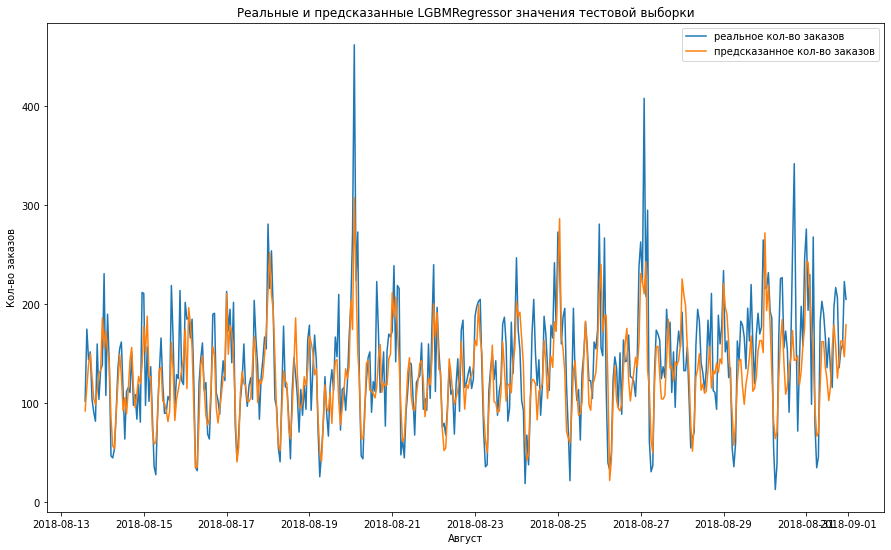

In [28]:
#визуализирую реальные и предсказанные значения тестовой выборки:
fig, ax = plt.subplots(figsize = (15, 9))
ax.plot(target_test.index, target_test, label = 'реальное кол-во заказов')
ax.plot(target_test.index, predictions, label = 'предсказанное кол-во заказов')
plt.title('Реальные и предсказанные LGBMRegressor значения тестовой выборки')
plt.xlabel('Август')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.show()

## Вывод

Были проделаны следующие действия:
* загружены данные и проведена ресемплинг данных по часу
* обучение трёх моделей с разными гиперпараметрами
* проведён анализ результатов трёх

В итоге было выявлено, что модель CatBoostRegressor показала лучший результат по метрике RMSE - 39.5. График CatBoostRegressor показал, что эта модель очень точно предсказывает значения.